In [1]:
import sys
sys.path.insert(1, '/its/home/drs25/Documents/GitHub/Quadruped/Code')
sys.path.insert(1, '/its/home/drs25/Quadruped/Code')
sys.path.insert(1, 'C:/Users/dexte/Documents/GitHub/Quadruped/Code')
import numpy as np 
import pandas as pd 
from os import walk
import pickle
from GA_gaitchange import F3

ModuleNotFoundError: No module named 'GA_gaitchange'

## Load in the data

### from evolution

In [ ]:
f=[]
path="/its/home/drs25/Quadruped/models/frictions_and_stuff/"
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    break
details={'friction':[],"speed":[],"stride":[],"body":[],"file":[],'best_idx':[],"fitness":[]}

for i in range(len(f)):
    if ".pkl" in f[i]:
        deets=f[i].replace(".pkl","").replace("friction","").split("_")
        fitnesses=np.load(path+f[i].replace("genotypes","fitnesses").replace(".pkl",".npy"))
        deets2=deets[5].split("-")
        details['friction'].append(deets[4])
        details['speed'].append(deets2[2])
        details['stride'].append(deets2[0])
        details['body'].append(deets2[1])
        details['file'].append(f[i])
        details['best_idx'].append(np.argmax(fitnesses))
        details['fitness'].append(np.max(fitnesses))
actual_frame=pd.DataFrame(details)
actual_frame.head()

,friction,speed,stride,body,file,best_idx,fitness
0,0.1,2,2,2,hillclimbergenotypes_dt0.1__0.1_friction0.1_2-...,5,-0.269145
1,0.0,2,2,2,hillclimbergenotypes_dt0.1__0.0_friction0.0_2-...,8,-0.393152
2,0.45,2,2,2,hillclimbergenotypes_dt0.1__0.45_friction0.45_...,27,-0.332030
3,0.6000000000000001,2,2,2,hillclimbergenotypes_dt0.1__0.6000000000000001...,49,-0.290679
4,0.75,2,2,2,hillclimbergenotypes_dt0.1__0.75_friction0.75_...,36,-0.286924


In [ ]:
#run trials to get all of the trajectories
from environment import *
from CPG import *
trajectories=[]

for index,item in details_frame.iterrows():
    print(index)
    #open the population from the experiment
    with open("/its/home/drs25/Quadruped/models/frictions_and_stuff/"+item['file'], 'rb') as f:
        population = pickle.load(f)
    env=environment(0,friction=float(item['friction']))
    _,history,_=env.runTrial(population[item['best_idx']],300)
    env.close()
    trajectories.append(history['positions'])

details['traj']=trajectories
actual_frame=pd.DataFrame(details)
actual_frame.head()

0


UnpicklingError: A load persistent id instruction was encountered,
but no persistent_load function was specified.

### from changes

In [ ]:
f=[]
path="/its/home/drs25/Quadruped/models/frictions_and_stuff/"
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)
    break
details={'friction':[],"speed":[],"stride":[],"body":[],"file":[],"traj":[]}

for i in range(len(f)):
    if ".npz" in f[i]:
        deets=f[i].replace(".npz","").split("_")
        details['friction'].append(deets[0])
        details['stride'].append(deets[1])
        details['body'].append(deets[2])
        details['speed'].append(deets[3])
        details['file'].append(f[i])
        fi=dict(np.load(path+f[i],allow_pickle=1))['arr_0'].item()
        traj=fi['positions']
        details['traj'].append(traj)

details_frame=pd.DataFrame(details)
details_frame.head()

,friction,speed,stride,body,file,traj
0,0.15000000000000002,1,2,2,0.15000000000000002_2_2_1.npz,"[[0.0021457094688541226, -0.031251248261395456..."
1,0.8500000000000001,2,1,0,0.8500000000000001_1_0_2.npz,"[[0.004257962923268348, -0.02352711338619299, ..."
2,0.25,2,0,2,0.25_0_2_2.npz,"[[0.0002149347249003163, -0.037771766799857595..."
3,0.05,1,2,2,0.05_2_2_1.npz,"[[0.004770435548552446, -0.038321744889425934,..."
4,0.9,2,1,1,0.9_1_1_2.npz,"[[0.002154269261615938, -0.0385120921973943, -..."


## plotting

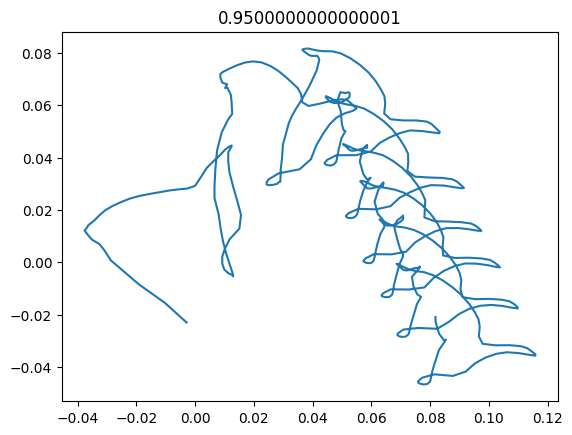

In [ ]:
import matplotlib.pyplot as plt 

example_row=list(details_frame.iterrows())[np.random.randint(0,10)]

coords=example_row[1]['traj']
plt.title(example_row[1]['friction'])
plt.plot(coords[:,0],coords[:,1])
plt.show()

In [ ]:
details_frame.loc[(details_frame['friction']=='0.25')]

,friction,speed,stride,body,file,traj
2,0.25,2,0,2,0.25_0_2_2.npz,"[[0.0002149347249003163, -0.037771766799857595..."
19,0.25,1,0,1,0.25_0_1_1.npz,"[[0.00039699307699894064, -0.03784111588747557..."
43,0.25,0,1,0,0.25_1_0_0.npz,"[[0.001397074567117777, -0.02446228001681747, ..."
78,0.25,0,2,1,0.25_2_1_0.npz,"[[0.0006445863893515835, -0.03382578041132678,..."
91,0.25,1,2,0,0.25_2_0_1.npz,"[[0.0007766193748261159, -0.033402066351609895..."
95,0.25,0,0,1,0.25_0_1_0.npz,"[[0.00039699307699894064, -0.03784111588747557..."
111,0.25,2,1,0,0.25_1_0_2.npz,"[[0.001397074567117777, -0.02446228001681747, ..."
138,0.25,1,2,2,0.25_2_2_1.npz,"[[0.0005910432224367811, -0.0337940855375697, ..."
148,0.25,2,0,0,0.25_0_0_2.npz,"[[0.0005479368075376089, -0.03763546599671714,..."
152,0.25,1,2,1,0.25_2_1_1.npz,"[[0.0006445863893515835, -0.03382578041132678,..."
